In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py  #与H5文件中存储的数据集进行交互的常用软件包。


In [8]:
# 载入数据
def load_data():
    train_dataset = h5py.File('data/train_catvnoncat.h5','r')
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])
    
    test_dataset = h5py.File('data/test_catvnoncat.h5','r')
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])
    test_set_y_orig = np.array(test_dataset["test_set_y"][:])
    
    classes = np.array(test_dataset['list_classes'][:]) #保存的是以bytes类型保存的两个字符串数据，数据为：[b’non-cat’ b’cat’]。
    
    train_set_y_orig = train_set_y_orig.reshape(1, train_set_y_orig.shape[0])
    test_set_y_orig = test_set_y_orig.reshape(1, test_set_y_orig.shape[0])
    
    return train_set_x_orig, test_set_x_orig, train_set_y_orig, test_set_y_orig

train_set_x_orig,test_set_x_orig,train_set_y,test_set_y = load_data()

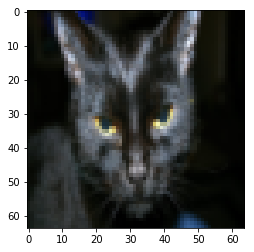

In [9]:
# 查看图像
index = 25
plt.imshow(train_set_x_orig[index]) #train_set_x_orig 是一个维度为(m_train，num_px，num_px，3）的数组

In [12]:
# 维度为（64，64，3）的numpy数组重新构造为（64 x 64 x 3，1）的数组
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

#标准化
train_set_x = train_set_x_flatten / 255
test_set_x = test_set_x_flatten / 255



In [23]:

# sigmod函数
def sigmod(z):
    
    return  1 / (1 + np.exp(-z))

In [13]:
# 初始化w，b 此函数为w创建一个维度为（dim，1）的0向量，并将b初始化为0。
def initialize_with_zeros(dim):
    
    w = np.zeros(shape = (dim, 1))
    b = 0
    
    return (w,b)

In [15]:
# 实现前向和后向传播的成本函数及其梯度
def propagate(w, b, X, Y):
    
    m = X.shape[1]
    
    #前向
    A = sigmod(np.dot(w.T, X) + b)
    cost = (-1 / m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    #后向
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)
    
    cost = np.squeeze(cost)
    
    grads = {
        "dw": dw,
        "db": db
    }
    
    return (grads, cost)
    

In [17]:
# 梯度下降更新参数
def optimize(w, b, X, Y, num_iterations, learning_rate,print_cost = False):
    
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w, b ,X, Y)
        
        dw = grads['dw']
        db = grads['db']
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost)
        
        if print_cost and i % 100 == 0:
            print("迭代次数： %i， 误差值： %f" % (i,cost))
        
    params = {
        'w': w,
        'b': b
    }
    grads = {
        'dw': dw,
        'db': db
    }
    return (params,grads,costs)
            

In [18]:
# 预测
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0],1)
    
    A = sigmod(np.dot(w.T, X) + b)
    for i in range(A.shape[1]):
        Y_prediction[0,i] = 1 if A[0,i] > 0.5 else 0
    
    return Y_prediction

In [26]:
#综合建模
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate = 0.5,print_cost = False):
    
    w,b = initialize_with_zeros(X_train.shape[0])
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    w,b = parameters['w'],parameters['b']
    
    Y_prediction_test = predict(w, b, X_test)
    
   
    print("测试集准确性："  , format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100) ,"%")
    
    d = {
        "costs": costs,
        "Y_prediction_test": Y_prediction_test,
        "w": w,
        "b": b,
        "learning_rate": learning_rate,
        "num_iterations": num_iterations
    }
    
    return d
    

In [27]:

d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)


迭代次数： 0， 误差值： 0.693147
迭代次数： 100， 误差值： 0.584508
迭代次数： 200， 误差值： 0.466949
迭代次数： 300， 误差值： 0.376007
迭代次数： 400， 误差值： 0.331463
迭代次数： 500， 误差值： 0.303273
迭代次数： 600， 误差值： 0.279880
迭代次数： 700， 误差值： 0.260042
迭代次数： 800， 误差值： 0.242941
迭代次数： 900， 误差值： 0.228004
迭代次数： 1000， 误差值： 0.214820
迭代次数： 1100， 误差值： 0.203078
迭代次数： 1200， 误差值： 0.192544
迭代次数： 1300， 误差值： 0.183033
迭代次数： 1400， 误差值： 0.174399
迭代次数： 1500， 误差值： 0.166521
迭代次数： 1600， 误差值： 0.159305
迭代次数： 1700， 误差值： 0.152667
迭代次数： 1800， 误差值： 0.146542
迭代次数： 1900， 误差值： 0.140872
测试集准确性： 70.0 %


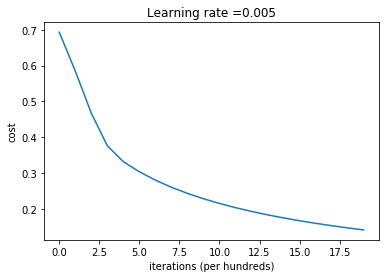

In [28]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()